## Balansiranje

In [40]:
import numpy as np  # Numerical Python
import matplotlib.pyplot as plt  # Python plotting
from scipy import signal
from scipy.fft import fft, fftshift

import numpy as np
import scipy.signal as signal


def open_txt_file(filename, n=8, m=3):
    '''the file itself has a header of n lines and than m number of colums. This function returns and array of m columns'''
    
    column1_data = []
    column2_data = []
    
    with open(filename, 'r') as file:

        # Skip the first n lines (header)
        for _ in range(n):
            next(file)

        # Read the remaining lines and extract data from the columns
        for line in file:
            columns = line.strip().split()
            if len(columns) == 2:
                column1_data.append(float(columns[0].strip()))
                column2_data.append(float(columns[1].strip()))
    
    return [np.array(column1_data), np.array(column2_data)]


def add_noise_to_signal(signal, noise_amplitude):
    noise = np.random.normal(scale=noise_amplitude, size=len(signal))
    return signal + noise



In [41]:
data = open_txt_file('meritve2/run1_0608.txt')
data

[array([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009,
        0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018,
        0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027,
        0.028, 0.029, 0.03 , 0.031, 0.032, 0.033, 0.034, 0.035, 0.036,
        0.037, 0.038, 0.039, 0.04 , 0.041, 0.042, 0.043, 0.044, 0.045,
        0.046, 0.047, 0.048, 0.049, 0.05 , 0.051, 0.052, 0.053, 0.054,
        0.055, 0.056, 0.057, 0.058, 0.059, 0.06 , 0.061, 0.062, 0.063,
        0.064, 0.065, 0.066, 0.067, 0.068, 0.069, 0.07 , 0.071, 0.072,
        0.073, 0.074, 0.075, 0.076, 0.077, 0.078, 0.079, 0.08 , 0.081,
        0.082, 0.083, 0.084, 0.085, 0.086, 0.087, 0.088, 0.089, 0.09 ,
        0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098, 0.099,
        0.1  , 0.101, 0.102, 0.103, 0.104, 0.105, 0.106, 0.107, 0.108,
        0.109, 0.11 , 0.111, 0.112, 0.113, 0.114, 0.115, 0.116, 0.117,
        0.118, 0.119, 0.12 , 0.121, 0.122, 0.123, 0.124, 0.125, 0.126,
      

### Debalans

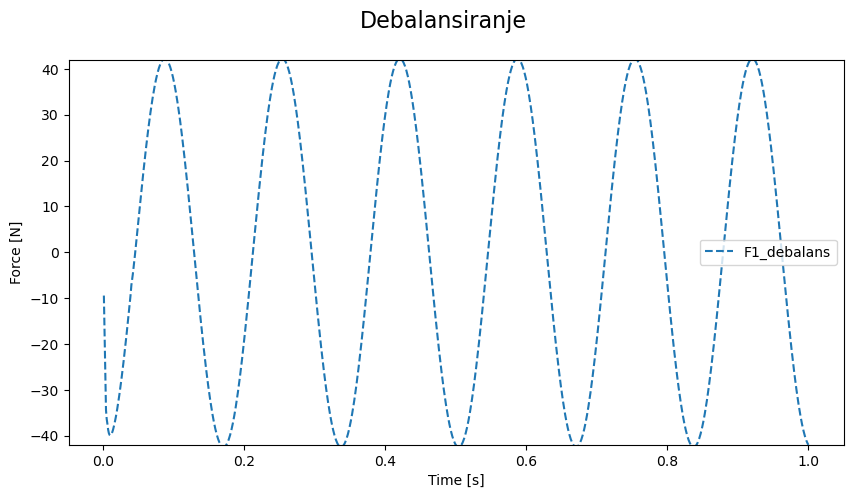

In [42]:
filename = 'meritve2/run1_0608.txt'
data = open_txt_file(filename)

Time = data[0]
t = Time
F1_debalans = data[1]

def print_data(data, Title, y1=-42, y2=42):
    '''data ima obliko [t, F1, F2]'''
    fig, ax = plt.subplots(figsize=(10, 5))
    fig.suptitle(Title, fontsize=16)
    ax.plot(data[0], data[1], '--', label='F1_debalans')
    ax.set_xlabel('Time [s]')
    ax.set_ylabel('Force [N]')
    ax.set_ylim(y1, y2)
    ax.legend();

data_debalans = open_txt_file(filename)
data_debalans[1] = data_debalans[1] - np.mean(data_debalans[1])
print_data(data_debalans, Title='Debalansiranje')


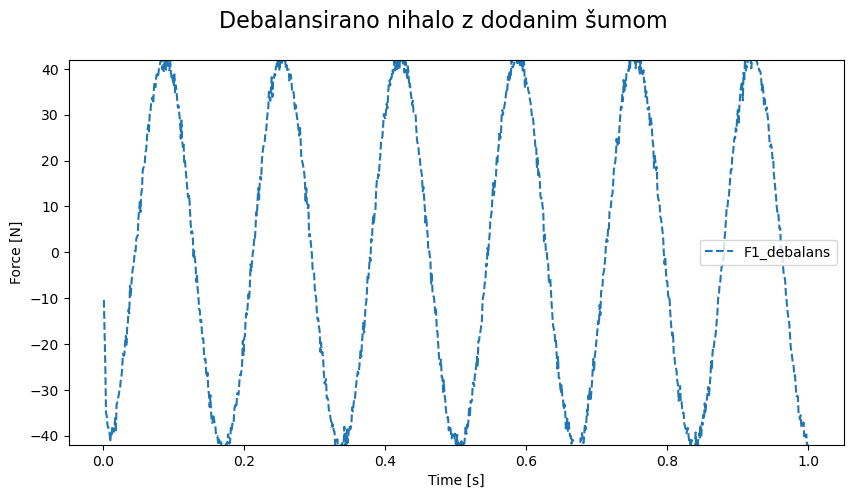

In [43]:
noise_amplitude = 1.2;
noise = np.random.normal(scale=noise_amplitude, size=len(t))
data_debalans_noise = data_debalans.copy()
data_debalans_noise[1] = data_debalans[1] + noise

print_data(data_debalans_noise, Title='Debalansirano nihalo z dodanim šumom')

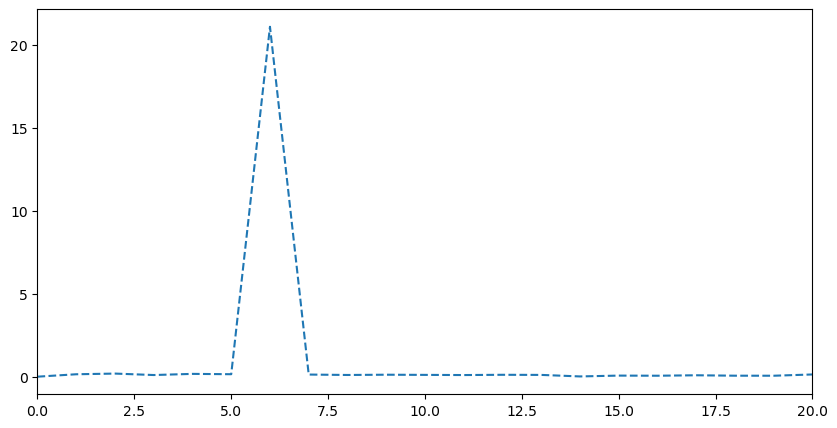

In [44]:
def Fourier(data):
    dt = data[0][1] - data[0][0]
    freq = np.fft.rfftfreq(len(data[0]), dt)
    Fourier_data = np.fft.rfft(data[1], norm="forward");

    fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    ax.plot(freq, np.abs(Fourier_data), '--')
    ax.set_xlim(0, 20)
    # freq
Fourier(data_debalans_noise)

In [45]:
# freq_F = 6;
# sos = signal.butter(3, [0.95*freq_F, 1.05*freq_F], 'bandpass', fs=1001, output='sos')
# filtriran_debalans = data_debalans.copy()
# filtriran_debalans[1] = signal.sosfiltfilt(sos, data_debalans_noise[1])#*np.hanning(len(Time)))
# filtriran_debalans[2] = signal.sosfiltfilt(sos, data_debalans_noise[2]*np.hanning(len(Time)))

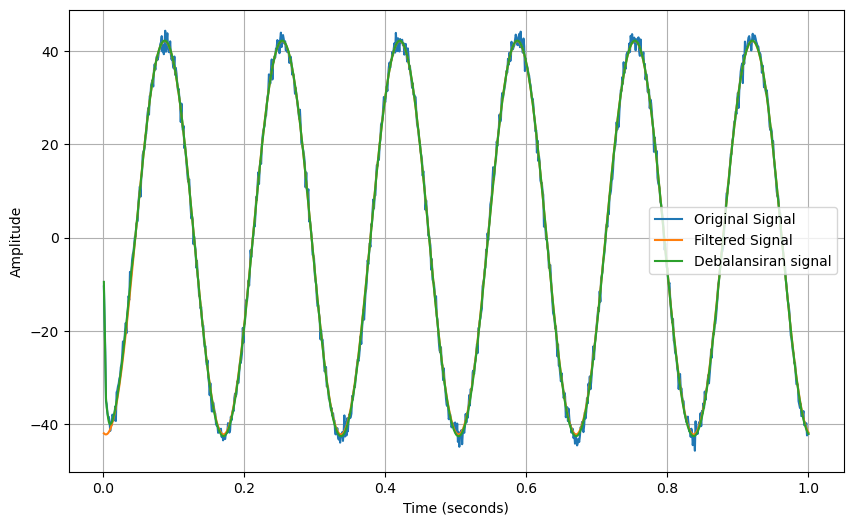

In [46]:
def filtriranje(t, original_signal, sampling_rate=1000, low_cutoff_freq=5.7, high_cutoff_freq=6.3):
    # Step 1: Compute the FFT of the original signal
    fft_signal = np.fft.fft(original_signal)

    # Step 2: Apply a frequency-domain filter (e.g., zero out frequencies outside a specific range)
    # Design the frequency domain filter (e.g., band-pass filter)
    freq_range = (low_cutoff_freq, high_cutoff_freq)
    filtered_fft_signal = np.copy(fft_signal)
    freqs = np.fft.fftfreq(len(fft_signal), d=1/sampling_rate)
    filtered_fft_signal[(freqs < freq_range[0]) | (freqs > freq_range[1])] = 0

    # Step 3: Compute the Inverse FFT to get the filtered signal in the time domain
    filtered_signal = 2*np.fft.ifft(filtered_fft_signal)
    return filtered_signal

filtered_signal = filtriranje(t=t, original_signal=data_debalans_noise[1], low_cutoff_freq=5.7, high_cutoff_freq=6.3)
# Plot the original and filtered signals
plt.figure(figsize=(10, 6))
plt.plot(t, data_debalans_noise[1], label='Original Signal')
plt.plot(t, filtered_signal.real, label='Filtered Signal')
plt.plot(t, data_debalans[1], label='Debalansiran signal')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()



In [47]:
def find_and_print_peaks(signal_array, min_peak_distance=50):
    peaks, _ = signal.find_peaks(signal_array, distance=min_peak_distance)
    print("Peaks found at indices:", peaks)
    return peaks

peaks_debalans = find_and_print_peaks(data_debalans[1], min_peak_distance=50)

def amplitude_and_phase(signal_array, peaks):
    amplitude = np.average(np.abs(signal_array[peaks]))
    dif = []
    for i in np.arange(len(peaks)-1):
        dif.append(peaks[i+1]-peaks[i])
    phase = peaks[-2]%(166)/np.average(dif) * 360
    print(f'Amplituda debalans = {amplitude:.3f} N')
    print(f'Faza debalans = {phase:.3f} stopinj')
    return amplitude, phase

A_u, phase_u = amplitude_and_phase(data_debalans[1], peaks_debalans)
# Example usage with a cleaner signal
# cleaner_signal = filtered_signal
# min_peak_distance = 50  # Set the minimum peak distance as needed

# peaks = find_and_print_peaks(cleaner_signal, min_peak_distance)
# peaks2 = find_and_print_peaks(data_debalans[1], min_peak_distance)

# fig, ax = plt.subplots(figsize=(10, 6))
# ax.plot(t, data_debalans[1], label='Original Signal')
# ax.plot(t, filtered_signal.real, label='Filtered Signal')
# ax.plot(t[peaks], filtered_signal[peaks].real, 'x', label='Detected Peaks_filtered')
# ax.plot(t[peaks2], data_debalans[1][peaks2], 'x', label='Detected Peaks_original')
# ax.set_xlabel('Time')
# ax.set_ylabel('Amplitude')
# ax.legend()
# ax.grid(True)


Peaks found at indices: [ 86 253 420 586 753 920]
Amplituda debalans = 42.216 N
Faza debalans = 192.086 stopinj


### Testna masa

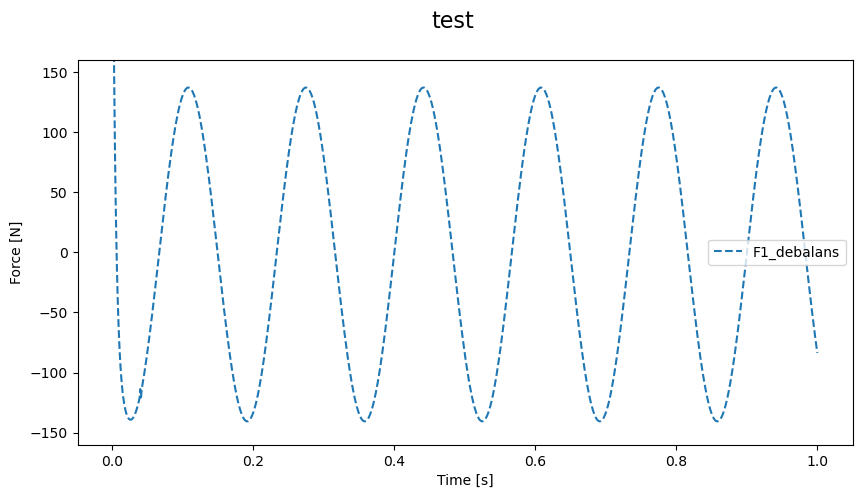

In [48]:
filename = 'meritve2/run4_0608.txt'
data = open_txt_file(filename)

Time = data[0]
t = Time
F1_debalans = data[1]

data_test = open_txt_file(filename)
data_test[1] = data_test[1] - np.mean(data_test[1])
print_data(data_test, Title='test', y1=-160, y2=160)



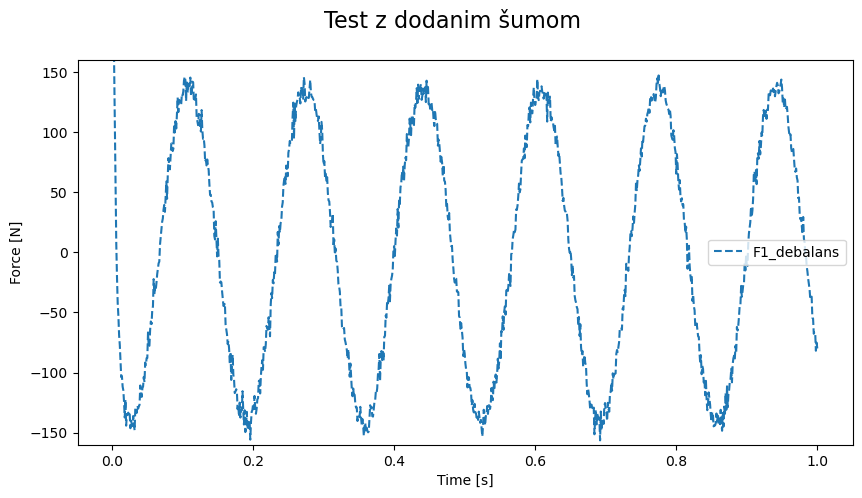

In [49]:
noise_amplitude = 6.2;
noise = np.random.normal(scale=noise_amplitude, size=len(t))
data_test_noise = data_test.copy()
data_test_noise[1] = data_test[1] + noise

print_data(data_test_noise, Title='Test z dodanim šumom', y1=-160, y2=160)

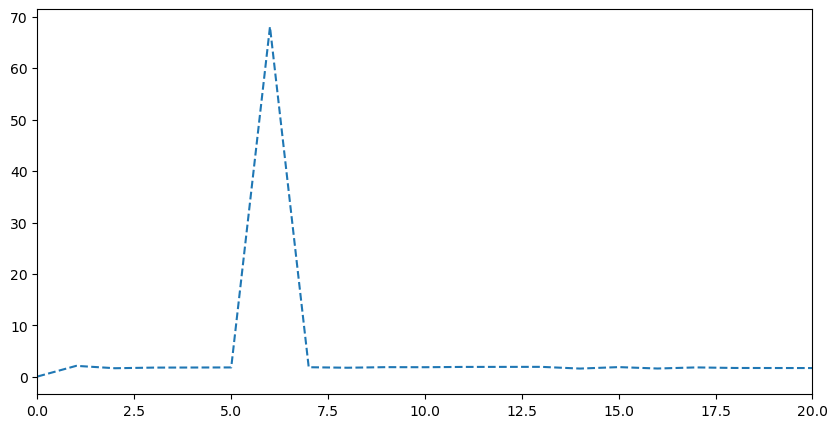

In [50]:
Fourier(data_test_noise)

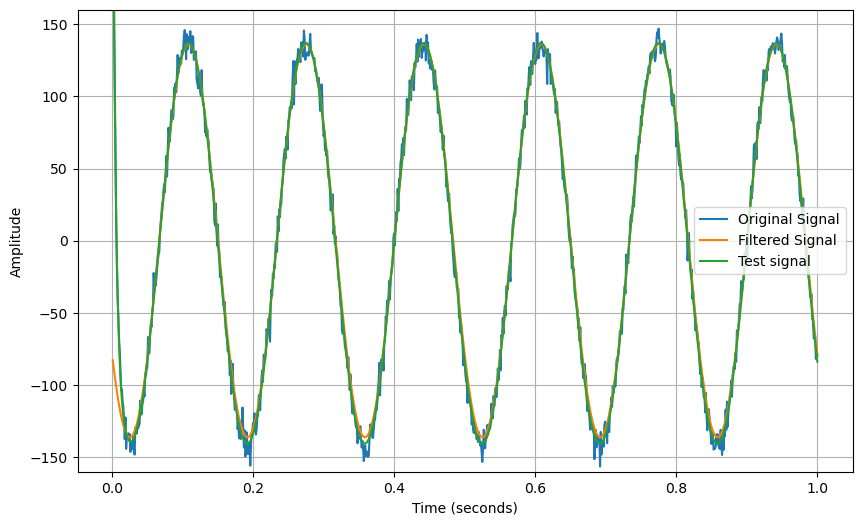

In [51]:
filtered_signal = filtriranje(t=t, original_signal=data_test_noise[1], low_cutoff_freq=5.7, high_cutoff_freq=6.3)
# Plot the original and filtered signals
plt.figure(figsize=(10, 6))
plt.plot(t, data_test_noise[1], label='Original Signal')
plt.plot(t, filtered_signal.real, label='Filtered Signal')
plt.plot(t, data_test[1], label='Test signal')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.ylim([-160, 160])
plt.legend()
plt.grid(True)
plt.show()

In [52]:
# def find_and_print_peaks(signal_array, min_peak_distance=50):
#     peaks, _ = signal.find_peaks(data_test[1], distance=min_peak_distance)
#     # print("Peaks found at indices:", peaks)
#     return peaks

peaks_test = find_and_print_peaks(data_test[1], min_peak_distance=50)

# def amplitude_and_phase(signal_array, peaks):
#     amplitude = np.average(np.abs(signal_array[peaks]))
#     dif = []
#     for i in np.arange(len(peaks)-1):
#         dif.append(peaks[i+1]-peaks[i])
#     phase = peaks[0]/np.average(dif) * 360
#     print(f'Amplituda debalans = {amplitude:.3f} N')
#     print(f'Faza debalans = {phase:.3f} stopinj')
#     return amplitude, phase

A_uw, phase_uw = amplitude_and_phase(data_test[1], peaks_test)

Peaks found at indices: [ 39 107 274 441 607 774 941]
Amplituda debalans = 133.560 N
Faza debalans = 263.415 stopinj


In [53]:
phase_u, phase_uw

(192.0863309352518, 263.4146341463415)

### Izračun korekcije

In [54]:
print(peaks_debalans)
print(peaks_test)
print(peaks_debalans[:6] - peaks_test[:6])

[ 86 253 420 586 753 920]
[ 39 107 274 441 607 774 941]
[ 47 146 146 145 146 146]


In [55]:
360 - 146/166 *360

43.373493975903614

${A_w}^2 = {A_{v+w}}^2 + {A_v}^2 - 2 A_v A_{v+w} \cdot cos(\alpha)$

In [56]:
alpha1 = (phase_u - phase_uw) * np.pi / 180
alpha1, np.cos(alpha1)

(-1.244913740894359, 0.3201450445541464)

In [57]:
A_w = np.sqrt(A_uw**2 + A_u**2 - 2*A_uw*A_u*np.cos(alpha1))
A_w, A_uw, A_u, alpha1

(126.53169792958847, 133.559990615, 42.21568491649666, -1.244913740894359)

In [58]:
A_u**2 + A_w**2 - A_uw**2, 2*A_u*A_w

(-45.836459165340784, 10683.24458348968)

In [59]:
alpha2_arccos = (A_u**2 + A_w**2 - A_uw**2)/(2*A_u*A_w)
alpha2 = np.arccos(alpha2_arccos)
alpha2*180/np.pi

90.24582828699667

In [60]:
A_u/A_w

0.33363722772445975

In [61]:
133*0.3336, 0.3336*1.6

(44.3688, 0.53376)

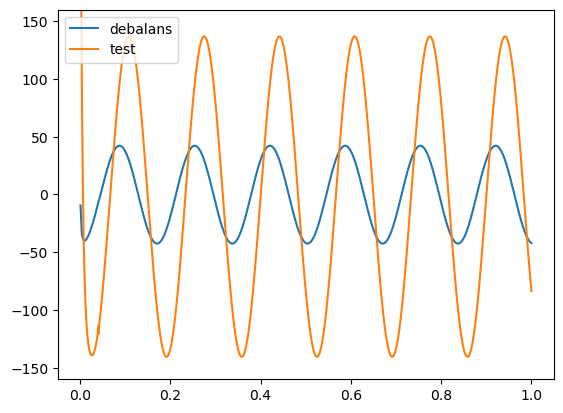

In [62]:
plt.plot(t, data_debalans[1], label='debalans')
plt.plot(t, data_test[1], label='test')
plt.ylim(-160, 160)
plt.legend()

In [63]:
A = np.array([10*np.cos(np.pi/6), 10*np.sin(np.pi/6)])
B = A - 10
B

array([-1.33974596, -5.        ])

In [98]:
np.arange(10) * 166 +1

array([   1,  167,  333,  499,  665,  831,  997, 1163, 1329, 1495])

In [103]:
def analiza(data1, data2, m_w, name1="Debalans", name2="Test"):
    
    ref = np.zeros_like(data1[1])
    for i in [0, 167, 333, 499, 655, 831, 997]:
        ref[i] = 100
    fig, ax = plt.subplots(figsize=(15, 5))
    ax.plot(data1[0], data1[1], label=f'{name1}')
    ax.plot(data2[0], data2[1], label=f'{name2}')
    ax.plot(data1[0], ref, label='Referenca')
    ax.legend()
    
    peaks1 = find_and_print_peaks(data1[1], min_peak_distance=140)
    peaks2 = find_and_print_peaks(data2[1], min_peak_distance=140)
    
    ax.plot(data1[0][peaks1], data1[1][peaks1], 'x', label='peaks1')
    ax.plot(data2[0][peaks2], data2[1][peaks2], 'x', label='peaks2')
    
    A_1, phase_1 = amplitude_and_phase(data1[1], peaks1)
    A_2, phase_2 = amplitude_and_phase(data2[1], peaks2)
    print()
    print()
    print(f'A_u = {A_1:.3f} N')
    print(f'phi_u = {phase_1:.3f} deg')
    print()
    print(f'A_uw = {A_2:.3f} N')
    print(f'phi_uw = {phase_2:.3f} deg')
    
    alpha1 = (phase_1 - phase_2) * np.pi / 180
    A_w = np.sqrt(A_2**2 + A_1**2 - 2*A_2*A_1*np.cos(alpha1))
    
    # alpha2_arccos = (A_u**2 + A_w**2 - A_uw**2)/(2*A_u*A_w)
    alpha2 = np.arccos((A_u**2 + A_w**2 - A_uw**2)/(2*A_u*A_w))
    print()
    print('Korekcijski podatki:')
    print(f'alpha 2 = {(alpha2*180/np.pi):.3f} deg')
    print(f'm_0 = {A_1/A_w * m_w} N')
    return A_1, phase_1, A_2, phase_2


Peaks found at indices: [ 86 253 420 586 753 920]
Peaks found at indices: [107 274 441 607 774 941]
Amplituda debalans = 42.216 N
Faza debalans = 192.086 stopinj
Amplituda debalans = 136.859 N
Faza debalans = 237.410 stopinj


A_u = 42.216 N
phi_u = 192.086 deg

A_uw = 136.859 N
phi_uw = 237.410 deg

Korekcijski podatki:
alpha 2 = 119.029 deg
m_0 = 0.6068657272681253 N


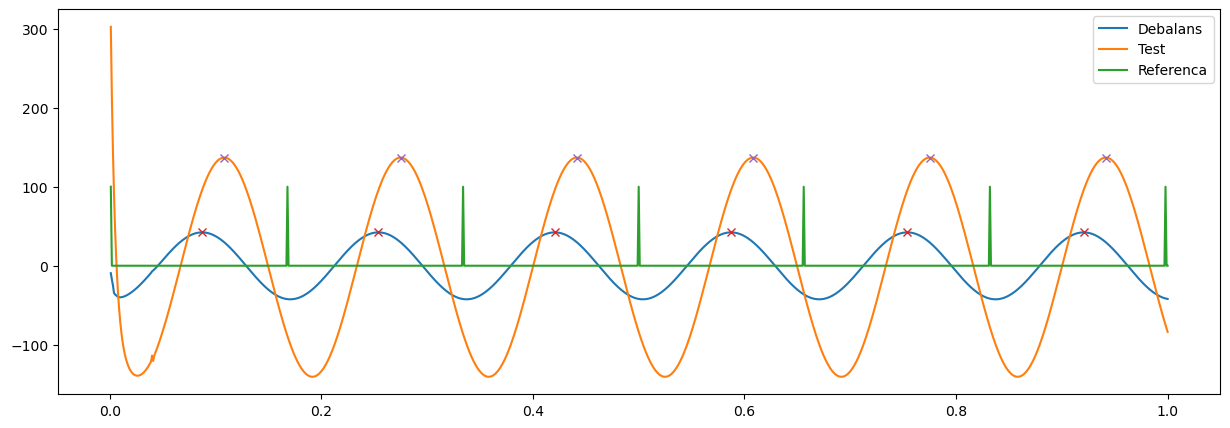

In [104]:
A_u, phase_u, A_uw, phase_uw = analiza(data_debalans, data_test, m_w=1.6)

${A_w}^2 = {A_{v+w}}^2 + {A_v}^2 - 2 A_v A_{v+w} \cdot cos(\alpha)$